In [1]:
from specim.specfuncs import spec1d
from keckcode.deimos import deimosmask1d
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/*'

In [3]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec1d' in p and 'MG0751' in p:
        if '.fits' in p:
            file_list.append(p)

In [4]:
file_list

['../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits',
 '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0035-MG0751+2716_LRISr_2020Dec13T124808.006.fits']

In [7]:
specid = [] #np.zeros(coadded_spectra.nspec)

for fl in file_list:
    spec = deimosmask1d.DeimosMask1d(fl)
    info = spec.slitinfo
    print(info)
    sp_id =[]
    for i in range(spec.nspec):
        spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
        sp_id.append(spec_id)
    specid.append(sp_id)

Reading 3 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    289     1      98 11.34621035121382
  2    289     2     121 12.18646166863591
  2    289     3     238 15.04691059015272
Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0035-MG0751+2716_LRISr_2020Dec13T124808.006.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    289     1     118  14.8900241266576
  2    289     2     237 14.89189318829743


Reading 3 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits
 Spectrum Start:  5652.11
 Spectrum End:     8872.84
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5652.08
 Spectrum End:     8872.73
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.96
 Spectrum End:     8871.99
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0035-MG0751+2716_LRISr_2020Dec13T124808.006.fits
 Spectrum Start:  5652.73
 Spectrum End:     8873.40
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5652.58
 Spectrum End:     8872.64
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



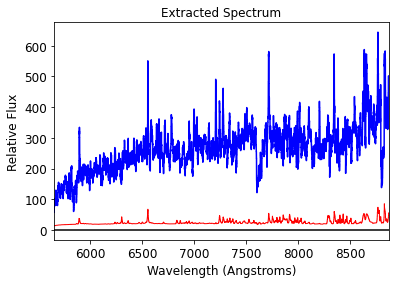

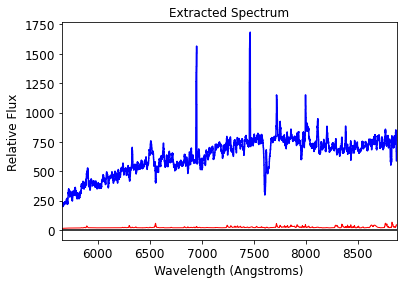

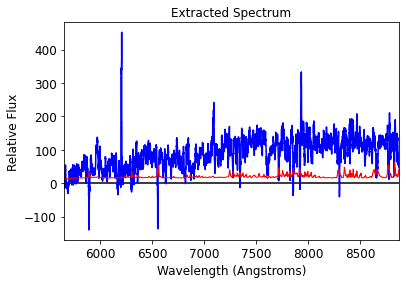

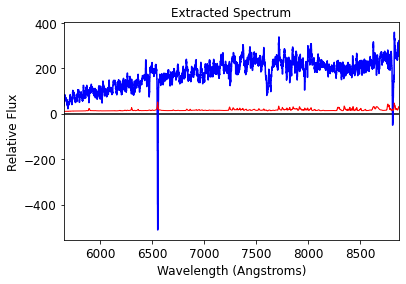

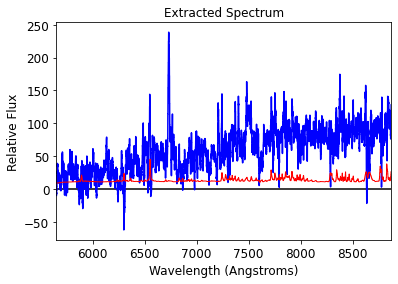

In [16]:
for i, fl in enumerate(file_list):
    spec = deimosmask1d.DeimosMask1d(fl)    
    
    for j in range(spec.nspec):
        sp = spec1d.Spec1d(wav=spec[specid[i][j]]['wav'], flux=spec[specid[i][j]]['flux'],
                           var=spec[specid[i][j]]['var'], trimsec=[0, -70])
        sp.smooth(11)

In [18]:
spec = deimosmask1d.DeimosMask1d(file_list[0])  

Reading 3 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits


In [19]:
sp1 = spec1d.Spec1d(wav=spec[specid[0][0]]['wav'], flux=spec[specid[0][0]]['flux'],
                           var=spec[specid[0][0]]['var'], trimsec=[0, -70])

 Spectrum Start:  5652.11
 Spectrum End:     8872.84
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


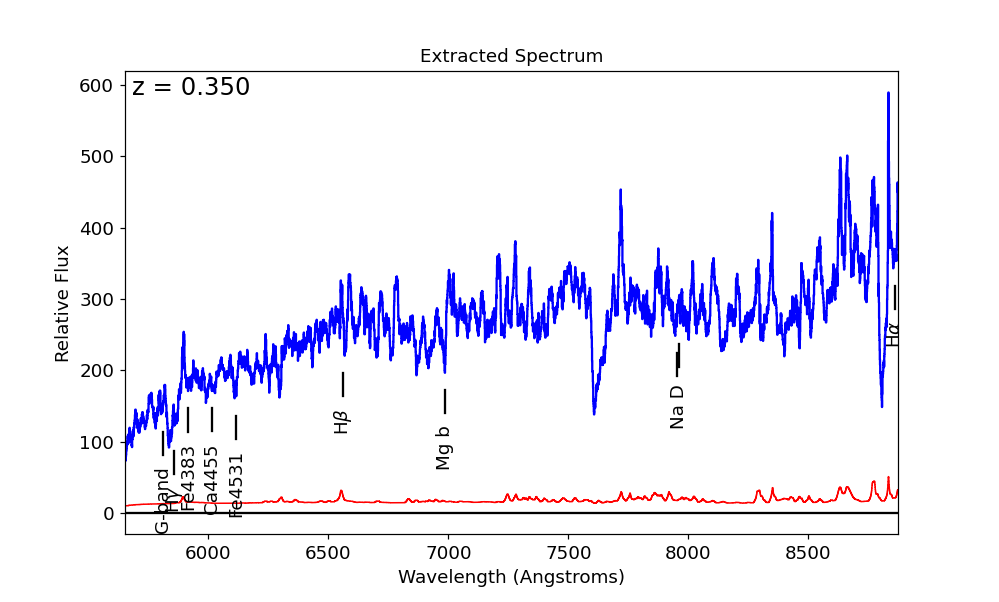


Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       5811.75
H-gamma       4340.00       5859.00
Fe4383        4383.00       5917.05
Ca4455        4455.00       6014.25
Fe4531        4531.00       6116.85
H-beta        4861.00       6562.35
Mg I (b)      5176.00       6987.60
Na I (D)      5889.95       7951.43
Na I (D)      5895.92       7959.49
H-alpha       6562.80       8859.78



In [23]:
%matplotlib notebook
sp1.smooth(21)
sp1.mark_lines('abs', z=0.35, usesmooth=True)

In [24]:
sp2 = spec1d.Spec1d(wav=spec[specid[0][1]]['wav'], flux=spec[specid[0][1]]['flux'],
                           var=spec[specid[0][1]]['var'], trimsec=[0, -20])

 Spectrum Start:  5652.08
 Spectrum End:     8912.34
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


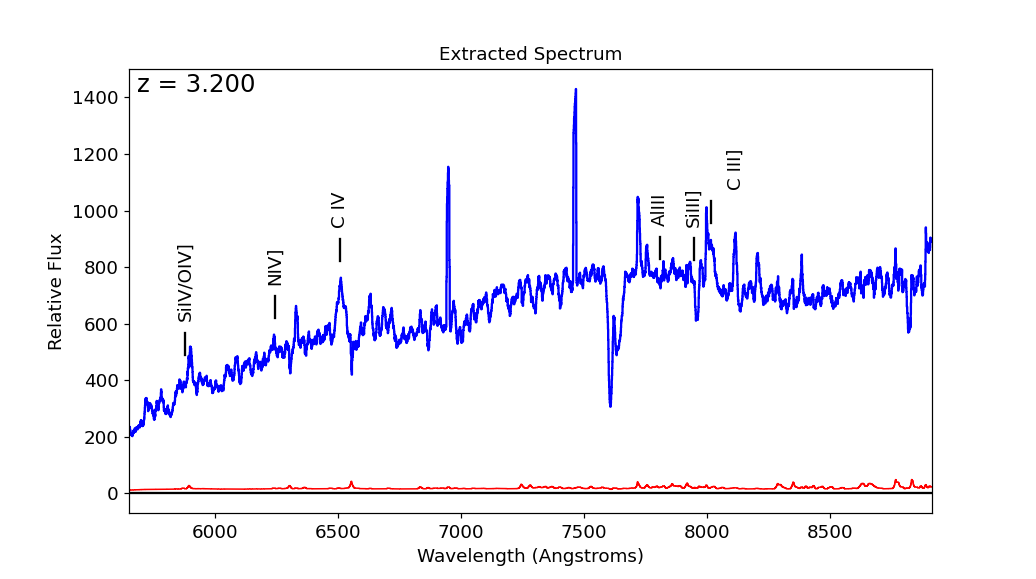


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Si IV/O IV    1400.00       5880.00
N IV]         1486.50       6243.30
C IV          1549.10       6506.22
Al III        1858.70       7806.54
Si III]       1892.00       7946.40
C III]        1908.70       8016.54



In [29]:
sp2.smooth(15)
sp2.mark_lines('strongem', z=3.2, usesmooth=True)

In [30]:
sp3 = spec1d.Spec1d(wav=spec[specid[0][2]]['wav'], flux=spec[specid[0][2]]['flux'],
                           var=spec[specid[0][2]]['var'], trimsec=[0, -20])

 Spectrum Start:  5651.96
 Spectrum End:     8911.59
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


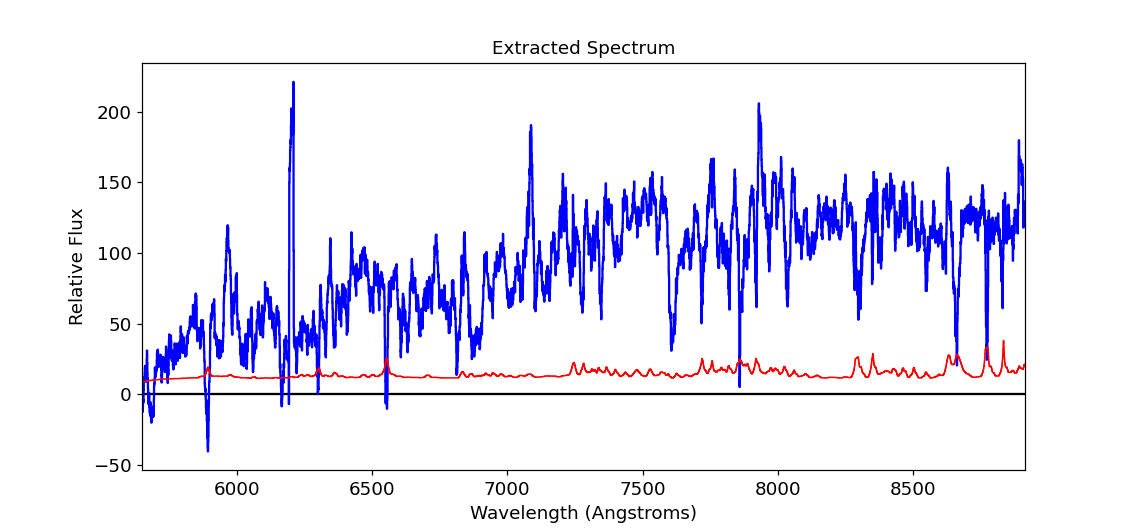

In [33]:
sp3.smooth(21)